# Sampling Point and Line Features

In [1]:
# Load relevant R packages
inLibraries = list('repr','spatstat','rgdal','classInt','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'classInt' was built under R version 3.4.2"Warning message:
"package 'rgeos' was built under R version 3.4.2"

In [3]:
# Read in shp file
counties <- readOGR("datasets/mo_counties","st_county10")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/mo_counties", layer: "st_county10"
with 115 features
It has 46 fields
Integer64 fields read as strings:  POP90 WHITE90 BLACK90 ASIANPI90 AMIND90 OTHER90 HISP90 POP00 WHITE00 BLACK00 ASIAN00 AMIND00 HAWNPI00 OTHER00 MULTRA00 HISP00 POP10 WHITE10 BLACK10 ASIAN10 AMIND10 HAWNPI10 OTHER10 MULTRA10 HISP10 


## Retrieve Geographic Extent

Prior to generating a set of point features, let's first define the region that will bound the area within which samples will be obtained. This can be done by querying the extent or bounding box of our featureclass with the bbox() function.

In [4]:
peek <- head(counties@data, 3)

t(peek)

,0,1,2
STATEFP10,29,29,29
COUNTYFP10,045,005,199
COUNTYNS10,00758477,00758457,00758552
GEOID10,29045,29005,29199
NAME10,Clark,Atchison,Scotland
NAMELSAD10,Clark County,Atchison County,Scotland County
LSAD10,06,06,06
CLASSFP10,H1,H1,H1
MTFCC10,G4020,G4020,G4020
CSAFP10,NA,NA,NA


In [5]:
#get extent
extent <- bbox(counties)
extent

,min,max
x,265131.4,847373
y,3986649.6,4496645


In [6]:
#get xy min and max values

xmin <- extent[1,1]
xmax <- extent[1,2]
ymin <- extent[2,1]
ymax <- extent[2,2]

In [7]:
xmin

[1] 265131.4

In [8]:
xmax

[1] 847373

In [9]:
ymin

[1] 3986650

In [10]:
ymax

[1] 4496645

In [11]:
#create a range vector for x and y
xrange <- c(xmin, xmax)
yrange <- c(ymin, ymax)

In [12]:
xrange

[1] 265131.4 847373.0

In [13]:
yrange

[1] 3986650 4496645

## Random, Uniformly Distributed Points

In order to create a point pattern in spatstat, an object of class "ppp" should be specified using the ppp() function.  Arguments to ppp() function include vectors of x and y coordinates, window of observations (extent) and marks (labels - think of these as categories of the variable). Other optional arguments can be included to make sure all observations are inside the window and there are no duplicate coordinates. 

Here, the runif() function is applied to produce random xy coordinate pairs with a uniform distribution. Then xy coordinates and window are used in the ppp() function to render the resulting point pattern. The window argument is an object of "owin" class in which the ranges in two-dimensional plane are set. Thus, this analysis window is simply the geographic box bounding the extent of the analysis region. Unlike the sp library, drawing samples from within a specific polygon is not directly supported. However, given what we've learned in earlier modules, that should not be a problem. That is, we now know how to do that....sample, assess which points fall within the region's areas, retain the ones that do, remove those that do not, sample more points if necessary.

For illustrative purposes, the randomly selected points are assigned a random label or category between 1 and 3 using the sample() and factor() functions.

In [14]:
# Set number of points to be selected
n <- 20

# Some arbitrary coordinates in the defined range
x <- runif(n, xmin, xmax)
y <- runif(n, ymin, ymax)

In [15]:
x

[1] 437018.6 472118.4 810366.7 743610.4 289343.3 616718.2 646337.9 600340.5
 [9] 306102.3 362532.0 328169.9 654625.0 740337.6 459167.3 692228.3 580549.9
[17] 573825.2 597614.6 579330.4 328158.3

In [16]:
y

[1] 4070134 4410688 4173764 4371201 4421649 4332815 4375074 4091944 4344578
[10] 4444171 4065661 4425280 4174265 4452254 4373740 4059602 4046645 4104243
[19] 4359658 4189003

In [17]:
# Generate three different categories randomly 
m <- sample(1:3, n, replace = TRUE)

m

[1] 2 1 1 2 3 1 1 2 3 1 2 1 1 1 1 1 3 1 1 1

In [18]:
m <- factor(m, levels = 1:3)

m

[1] 2 1 1 2 3 1 1 2 3 1 2 1 1 1 1 1 3 1 1 1
Levels: 1 2 3

In [19]:
window <- owin(xrange, yrange)

In [20]:
# Create ppp object
point.pattern <- ppp(x, y, window = window, marks = m)

point.pattern

Marked planar point pattern: 20 points
Multitype, with levels = 1, 2, 3 
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

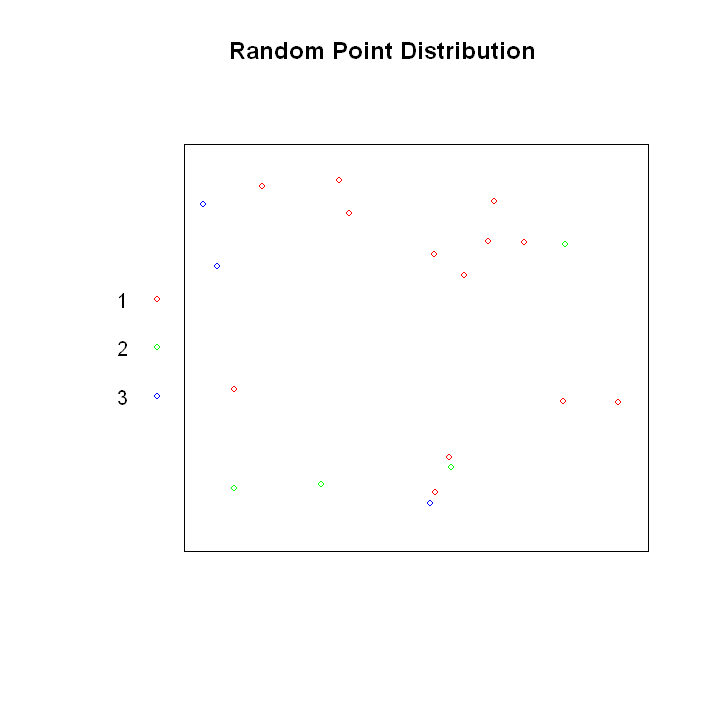

In [21]:
# Plot the ppp object
plot(point.pattern, shape = c("circles", "circles", "circles"), 
             cols = c("red","green","blue"),
             size = 7200,
             main = "Random Point Distribution")

### Convert ppp to Spatial Data Frame

While plotting using the spatstat routines is viable, it may be better at this point if we transform the ppp point pattern object into something more familiar, say a spatial point dataframe. This can be done using the SpatialPointsDataFrame() function (sp library). This function requires the coordinates of points, any data that may be related to the points (if any), the proj4string CRS info, as well as a defined bounding box.

After this conversion is complete, the point data can be plotted as we have done before.

In [22]:
point.pattern

Marked planar point pattern: 20 points
Multitype, with levels = 1, 2, 3 
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [23]:
xDF <- data.frame(point.pattern$x)

xDF

point.pattern.x
437018.6
472118.4
810366.7
743610.4
289343.3
616718.2
646337.9
600340.5
306102.3
362532.0


In [24]:
yDF <- data.frame(point.pattern$y)

yDF

point.pattern.y
4070134
4410688
4173764
4371201
4421649
4332815
4375074
4091944
4344578
4444171


In [25]:
# extract coordinates from ppp object
ptcoords <- cbind(xDF, yDF)

ptcoords

point.pattern.x,point.pattern.y
437018.6,4070134
472118.4,4410688
810366.7,4173764
743610.4,4371201
289343.3,4421649
616718.2,4332815
646337.9,4375074
600340.5,4091944
306102.3,4344578
362532.0,4444171


In [26]:
#get projection of input data

prj <- proj4string(counties)

prj

[1] "+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0"

In [27]:
#get bounding box of input data

bb <- bbox(counties)

bb

,min,max
x,265131.4,847373
y,3986649.6,4496645


In [28]:
# create to spatial points data frame

spts <- SpatialPointsDataFrame(ptcoords, 
                                   data = data.frame(point.pattern), 
                                   proj4string = CRS(prj), 
                                   bbox = bb)

head(spts)

          coordinates        x       y marks
1 (437018.6, 4070134) 437018.6 4070134     2
2 (472118.4, 4410688) 472118.4 4410688     1
3 (810366.7, 4173764) 810366.7 4173764     1
4 (743610.4, 4371201) 743610.4 4371201     2
5 (289343.3, 4421649) 289343.3 4421649     3
6 (616718.2, 4332815) 616718.2 4332815     1

In [29]:
dim(spts)

[1] 20  3

In [30]:
#assign colors to categories
pal <- c("blue","red","green")
val <- as.numeric(spts@data$marks)
cols <- pal[val]

In [31]:
pal

[1] "blue"  "red"   "green"

In [32]:
val

[1] 2 1 1 2 3 1 1 2 3 1 2 1 1 1 1 1 3 1 1 1

In [33]:
cols[1:10]

[1] "red"   "blue"  "blue"  "red"   "green" "blue"  "blue"  "red"   "green"
[10] "blue"

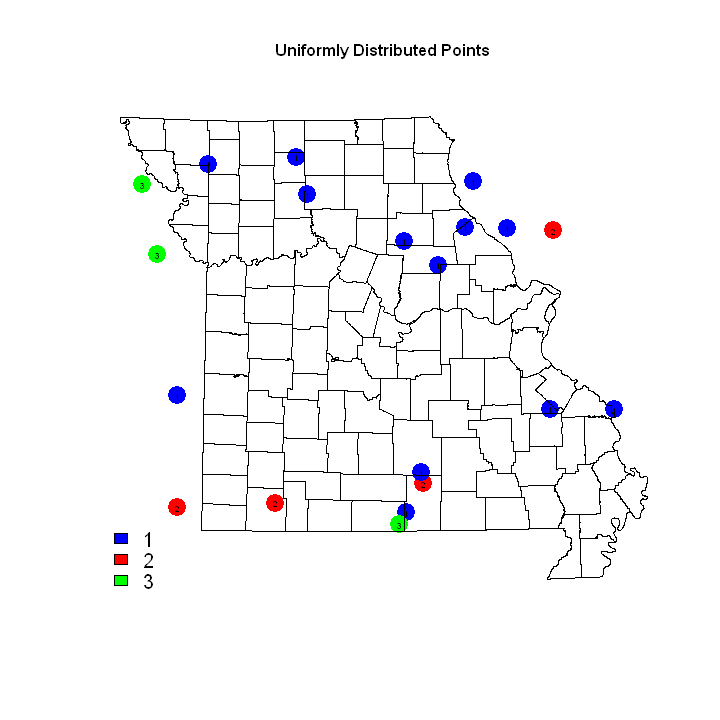

In [34]:
#plot the points
plot(spts, col = cols, pch = 20, cex = 3, 
         lwd = 0.2, 
         main = "Uniformly Distributed Points", 
         cex.main = 0.8)

leg <- c("1", "2","3")

legend("bottomleft", fill = pal, legend = leg, bty = "n")

plot(counties, add = TRUE)

centroids <- gCentroid(spts, byid = TRUE)

centroidLons <- coordinates(spts)[,1]

centroidLats <- coordinates(spts)[,2]


#label points
text(centroidLons, centroidLats, labels = spts@data$mark,cex = 0.4)

## Stratified Random Distribution

Given an extent window, a stratified random point pattern can be implemented using the rstrat() function. This function divides the extent window into a set of rectangular grid tiles and places k random points independently within each tile. In this example, nx and ny control the number of grid tiles that are used to subdivide the region. 

Experiment with this function - i.e. change nx, ny, k and observe what happens. Keep in mind though that larger nx and ny and k can result in voluminous results.

In [36]:
# Create an extent window object
window.obj <- owin(xrange, yrange)

window.obj

window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [37]:
# Simulate stratified point pattern
point.strat.pattern <- rstrat(window.obj, nx = 10, ny = 10, k = 1)

point.strat.pattern

Planar point pattern: 100 points
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [38]:
xDF <- data.frame(point.strat.pattern$x)
yDF <- data.frame(point.strat.pattern$y)

# extract coordinates from ppp object
ptcoords <- cbind(xDF, yDF)

head(ptcoords)

point.strat.pattern.x,point.strat.pattern.y
297774.9,4021837
324608.1,3999465
435445.6,4011586
488879.7,3996966
529141.2,4010051
556500.7,4007815


In [39]:
# create to spatial points data frame
spts <- SpatialPointsDataFrame(ptcoords, 
                                   data = data.frame(point.strat.pattern), 
                                   proj4string = CRS(prj),
                                   bbox = bb)

head(spts)

          coordinates        x       y
1 (297774.9, 4021837) 297774.9 4021837
2 (324608.1, 3999465) 324608.1 3999465
3 (435445.6, 4011586) 435445.6 4011586
4 (488879.7, 3996966) 488879.7 3996966
5 (529141.2, 4010051) 529141.2 4010051
6 (556500.7, 4007815) 556500.7 4007815

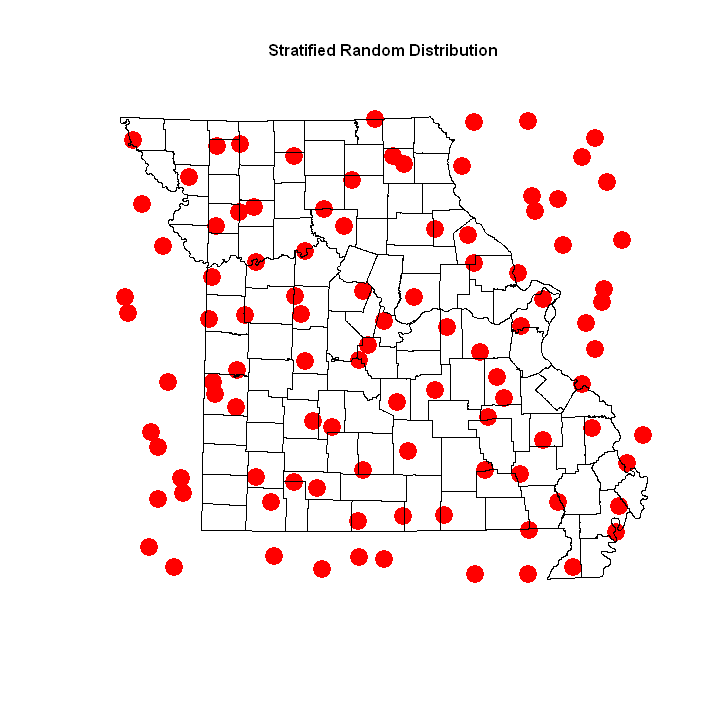

In [40]:
#plot the points
cols <- c("red")

plot(spts, col = cols, pch = 20, 
         cex = 3, lwd = 0.2, 
         main="Stratified Random Distribution", 
         cex.main = 0.8)

plot(counties, add = TRUE, lwd = 0.5)

## Randomly Distributed Points

Here, rpoint() function is applied to retrieve a random independent, identically distributed point pattern for a specified distribution. In this case, the probability density is proportional to x^2 + y^2. However, this function allows any distribution function to be entered.

In [41]:
xrange

[1] 265131.4 847373.0

In [42]:
yrange

[1] 3986650 4496645

In [43]:
# Create an extent window object
window.obj <- owin(xrange, yrange)

window.obj

window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [44]:
# Set number of points to be sampled
n <- 20

fun <- function(x, y) { 
    x^2 + y^2
}

# Random points with probability density proportional to x^2 + y^2
random.point.pattern <- rpoint(n, win = window.obj, fun, 1)

In [45]:
random.point.pattern

Planar point pattern: 20 points
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [46]:
xDF <- data.frame(random.point.pattern)$x
yDF <- data.frame(random.point.pattern$y)

# extract coordinates from ppp object
ptcoords <- cbind(xDF, yDF)

head(ptcoords)

xDF,random.point.pattern.y
300599.6,4427970
347609.6,4340011
774410.0,4229092
309708.5,4450147
503752.1,4317454
414682.4,4416140


In [47]:
# create to spatial points data frame
spts <- SpatialPointsDataFrame(ptcoords, 
                                   data = data.frame(random.point.pattern), 
                                   proj4string = CRS(prj), 
                                   bbox = bb)


head(spts)

          coordinates        x       y
1 (300599.6, 4427970) 300599.6 4427970
2 (347609.6, 4340011) 347609.6 4340011
3   (774410, 4229092) 774410.0 4229092
4 (309708.5, 4450147) 309708.5 4450147
5 (503752.1, 4317454) 503752.1 4317454
6 (414682.4, 4416140) 414682.4 4416140

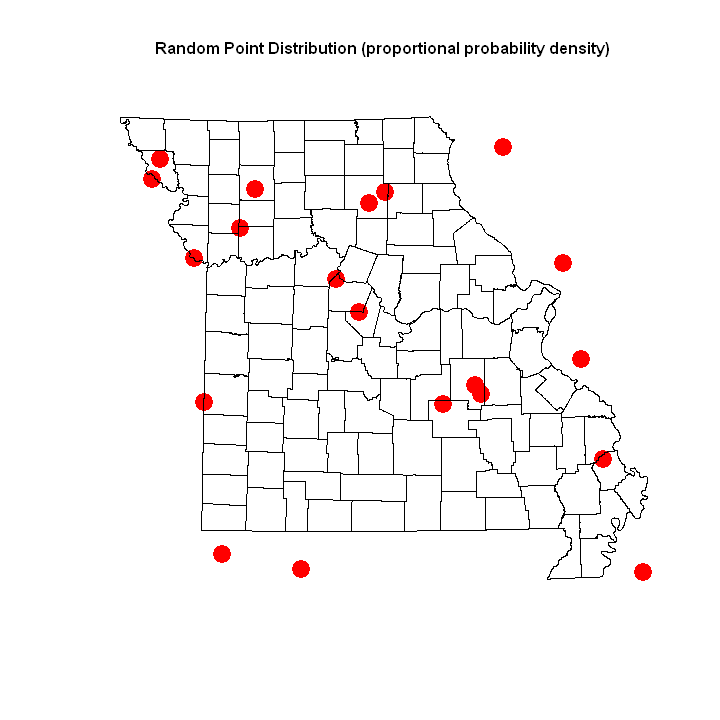

In [48]:
#plot the points

cols <- c("red")

plot(spts, col = cols, pch = 20, cex = 3, lwd = 0.2, 
         main = "Random Point Distribution (proportional probability density)", 
         cex.main = 0.8)

plot(counties, add = TRUE)

## Quasi-Random Distributed Points

Here, the quasirandom() function is used to simulate a quasi-random independent, identically distributed point pattern for a specified distribution. In this case, the Halton quasi-random number generator is applied.

In [49]:
# Create an extent window object
window.obj <- owin(xrange,yrange)

# Set number of points to be sampled
n <- 20

# quasi random point distribution
quasirandom.pt.pattern <- rQuasi(n, W=window.obj, type = c("Halton"))

In [50]:
quasirandom.pt.pattern

Planar point pattern: 20 points
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [51]:
# extract coordinates from ppp object
ptcoords <- cbind(data.frame(quasirandom.pt.pattern)$x, 
                      data.frame(quasirandom.pt.pattern$y))

head(ptcoords)

data.frame(quasirandom.pt.pattern)$x,quasirandom.pt.pattern.y
556252.2,4156648
410691.8,4326647
701812.6,4043316
337911.6,4213314
629032.4,4383313
483472.0,4099982


In [52]:
# create to spatial points data frame
spts <- SpatialPointsDataFrame(ptcoords, 
                                   data = data.frame(quasirandom.pt.pattern),
                                   proj4string = CRS(prj), 
                                   bbox = bb)

head(spts)

          coordinates        x       y
1 (556252.2, 4156648) 556252.2 4156648
2 (410691.8, 4326647) 410691.8 4326647
3 (701812.6, 4043316) 701812.6 4043316
4 (337911.6, 4213314) 337911.6 4213314
5 (629032.4, 4383313) 629032.4 4383313
6   (483472, 4099982) 483472.0 4099982

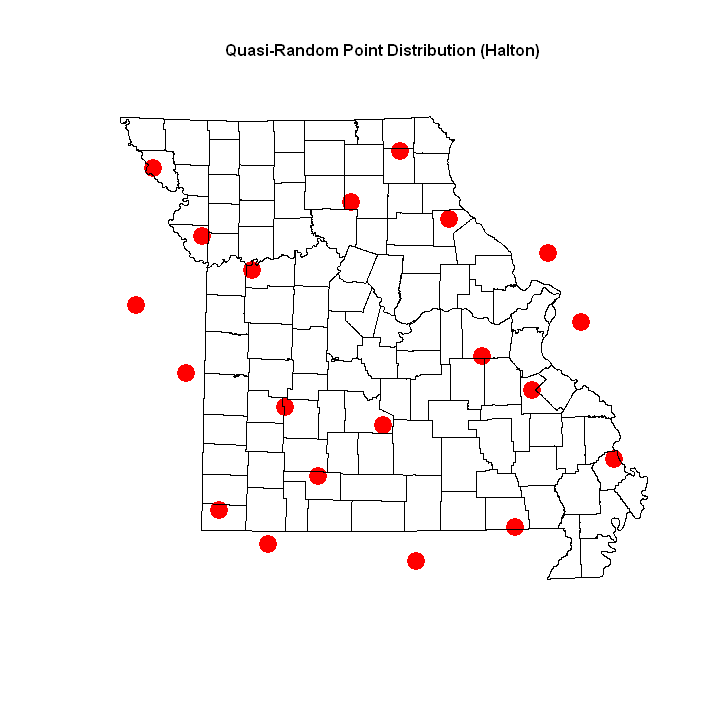

In [53]:
#plot the points
cols <- c("red")
plot(spts, col=cols, pch=20,cex=3,lwd=.2,main="Quasi-Random Point Distribution (Halton)",cex.main=.8)
plot(counties,add=TRUE)

## Randomly Shift Distributed Points

Have you ever been perturbed? Well, it turns out that it is quite easy to perturb a point distribution. Sometimes, it is desirable to slightly perturb the points, something termed jittering. In other cases, one might wish to throw the points into a completely new unfamiliar state. One way to accomplish this is via the rshift() function. This function can be used to apply a random shift to a set of features. Here, it is applied to the quasi-random distribution generated earlier. Observe how the distribution changes.

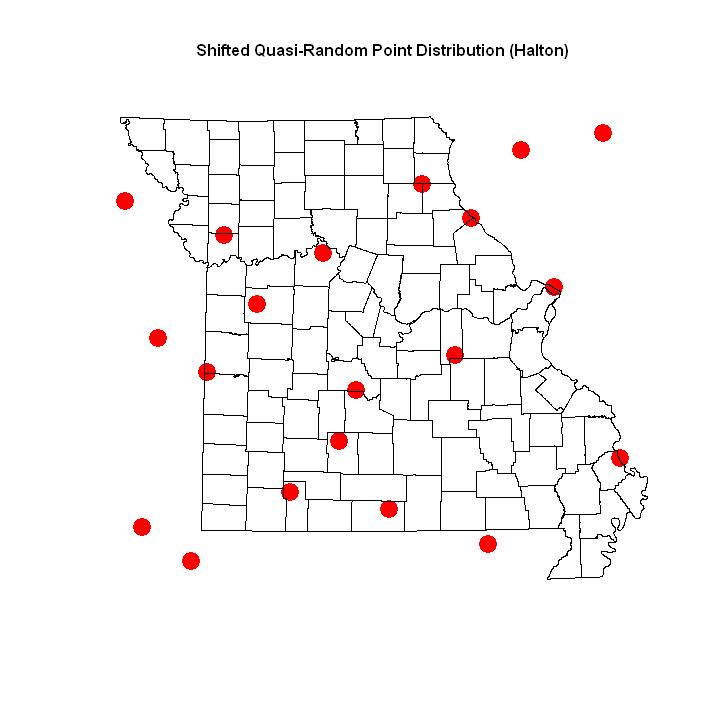

In [54]:
# Create an extent window object
window.obj <- owin(xrange,yrange)

# Set number of points to be sampled
n <- 20

# apply random shift to quasi random point distribution
shiftrandom.pt.pattern <- rshift(quasirandom.pt.pattern)

# extract coordinates from ppp object
ptcoords <- cbind(data.frame(shiftrandom.pt.pattern)$x, 
                          data.frame(shiftrandom.pt.pattern$y))

# create to spatial points data frame
spts <- SpatialPointsDataFrame(ptcoords, 
                                   data = data.frame(shiftrandom.pt.pattern), 
                                   proj4string = CRS(prj),
                                   bbox = bb)

#plot the points
cols <- c("red")
plot(spts, col=cols, pch=20,cex=3,lwd=.2,main="Shifted Quasi-Random Point Distribution (Halton)",cex.main=.8)
plot(counties,add=TRUE)

## Assessing Correspondence among Point Distributions

Given two point distributions with the same number of points, one might wish to match each point in one distribution with a point in the other such that the average distances are minimized. This can help when reasoning about the level of spatial correspondence between two point distributions.  The pppdist() function (spatstat library) can assist with this task. First, to random, uniformly distributed sets of 50 points are generated. Then the pppdist() function is applied. 

In [55]:
# Create an extent window object
window.obj <- owin(xrange,yrange)

# number of point patterns to be simulated 
n <- 50

# Generate two point patterns
point.pattern.1 <- runifpoint(n, win = window.obj)
point.pattern.2 <- runifpoint(n, win = window.obj)

In [56]:
point.pattern.1

Planar point pattern: 50 points
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [57]:
point.pattern.2

Planar point pattern: 50 points
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [58]:
# Conduct optimal point matching
matching <- pppdist(point.pattern.1, point.pattern.2)

matching

spa-1 matching of two planar point patterns (cutoff = 1) 
pp1: 50 points 
pp2: 50 points 
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units
point matching, 50 lines 
distance: 1 

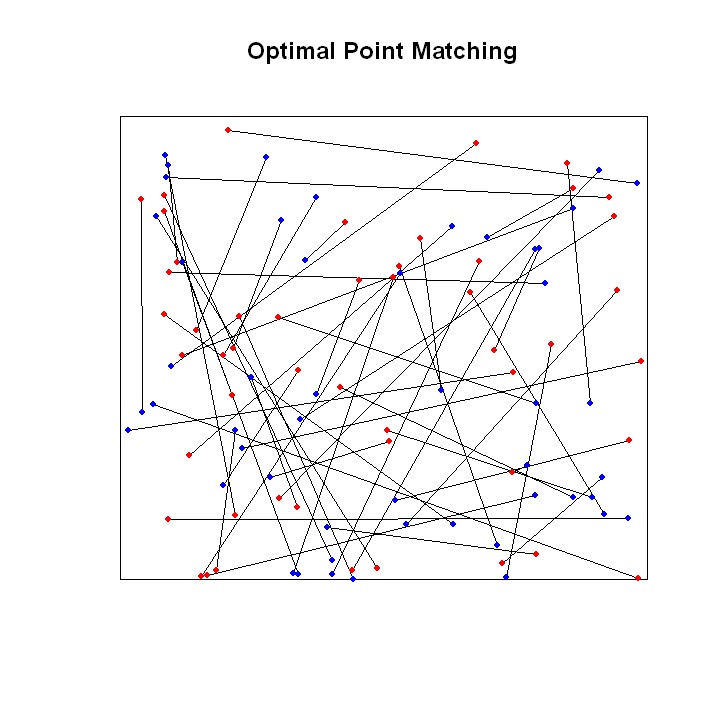

In [59]:
# plot
plot(matching, main = "Optimal Point Matching")

## Random, Uniform 3-D Point Distributions

The runifpoint3() function (spatstat library) can be used to generate n indpendent random points uniformly distributed in a three dimensional space. The arguments to the function are number of points to be generated and box domain. The box domain can be set by box3 object representing a three dimensional box.

In [60]:
# Set number of points to be sampled
n <- 20

# Create box object 
box.3 <- box3(xrange, 
                  yrange, 
                  zrange = c(0,200000), 
                  unitname = c("metre","metres"))



In [61]:
box.3

Box: [265130, 847370] x [3986600, 4496600] x [0, 2e+05] metres

In [62]:
names(box.3)

[1] "xrange" "yrange" "zrange" "units"

In [63]:
head(box.3$xrange)

[1] 265131.4 847373.0

In [64]:
# Generate point pattern
point.pattern.3 <- runifpoint3(n, box.3)

point.pattern.3

Three-dimensional point pattern
20 points
Box: [265130, 847370] x [3986600, 4496600] x [0, 2e+05] metres

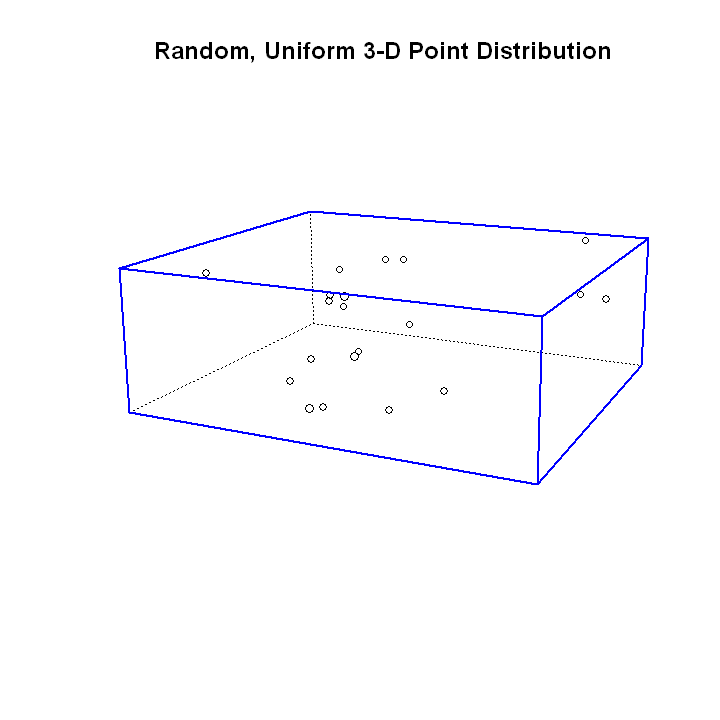

In [65]:
# Plot generated point pattern
plot(point.pattern.3, 
              main="Random, Uniform 3-D Point Distribution", 
              box.back = list(lty = 3))

In [66]:
# Print point coordinates
df3d <- data.frame(point.pattern.3)

head(df3d)

x,y,z
389355.3,4379335,72138.82
466790.3,4463916,30135.27
768247.3,4419919,121450.00
655857.0,4165938,31008.36
581191.3,4022672,187894.87
390258.0,4364061,135707.67


## Random, Uniform n-Dimensional Point Distributions

Random points can be generated in any number of dimensions by function runifpointx(). The number of points to be generated and multi-dimensional box need to be specified for the function. Obviously, objects on more than three dimensions cannot be plotted so the coordinates of generated points can be accessed as below.

In [67]:
# Set number of points to be sampled
n <- 30

box.m <- boxx(xrange, 
                  yrange, 
                  c(0,50000), 
                  c(0,70000), 
                  unitname = c("metre","metres"))

box.m

4-dimensional box:
[265130, 847370] x [3986600, 4496600] x [0, 50000] x [0, 70000] metres  

In [68]:
points.multi <- runifpointx(n, box.m)

points.multi

Multidimensional point pattern
30 points 
4-dimensional space coordinates (x1,x2,x3,x4)
Domain:
	4-dimensional box:
[265130, 847370] x [3986600, 4496600] x [0, 50000] x [0, 70000] metres  

In [69]:
head(data.frame(points.multi))

x1,x2,x3,x4
498059.7,4444249,23368.407,56314.88
522173.6,4162018,15465.477,46344.16
415067.1,4469383,10273.677,59143.33
393518.7,4451038,23314.812,23683.91
803416.9,4157266,17719.712,64691.43
366559.4,4006951,3831.367,14523.53


## Random Line Distribution

The psp() function (spdep library) can be used to create line segment patterns in a two-dimensional plane. The arguments include vectors of cartesian coordinates of endpoints, and window of observations, an object of class "owin". Here, we create n random segments and the window argument is set by observations.

In [70]:
# Create an extent window object
window.obj <- owin(xrange, yrange)

# Set number of line segments to be sampled
n <- 20

# Create a label dataframe
m <- data.frame(A = 1:n, 
                    B = letters[1:n])

head(m, 10)

A,B
1,a
2,b
3,c
4,d
5,e
6,f
7,g
8,h
9,i
10,j


In [71]:
# Generate segment pattern
line.pattern <- psp(runif(n,xmin,xmax), 
                        runif(n,ymin,ymax), 
                        runif(n,xmin,xmax), 
                        runif(n,ymin,ymax), 
                        window = window.obj,
                        marks = m)

line.pattern

marked planar line segment pattern: 20 line segments
Mark variables:  A, B
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

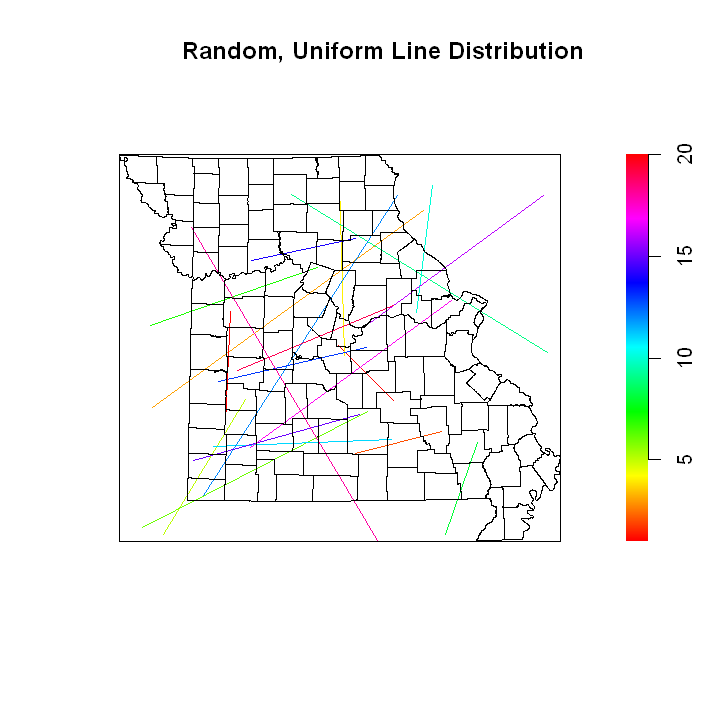

In [72]:
# Plot generated segment pattern
plot.psp(line.pattern, 
             main = "Random, Uniform Line Distribution")

plot(counties, add = TRUE)

#### Extracting Line Characteristics
Once the line pattern has been generated, the characteristics of line segments can be accessed as follows.

In [73]:
print ("length of lines")
lengths.psp(line.pattern)

[1] "length of lines"


[1] 103008.5 116944.5 442249.5 226928.8 209000.7 334630.8 233568.4 128373.7
 [9] 397649.0 169115.8 236221.3 472446.0 199677.0 139518.2 227450.3 283672.9
[17] 329586.3 481215.7 221908.6 147473.8

In [74]:
print ("Mid-points coordinate of lines")
head(data.frame (midpoints.psp (line.pattern)))


[1] "Mid-points coordinate of lines"


x,y
590564.1,4208677
634092.3,4117392
488227.1,4293173
559093.7,4345535
377384.6,4084656
443809.4,4080634


In [75]:
print ("End-point coordinate of lines")
head(data.frame (endpoints.psp (line.pattern)))

[1] "End-point coordinate of lines"


x,y
554361.6,4245312
626766.7,4172043
577438.4,4102924
690746.2,4131861
309155.5,4163445
667298.6,4422902


In [76]:
print ("Lines angle")
head(data.frame (angles.psp (line.pattern)))

[1] "Lines angle"


angles.psp.line.pattern.
2.3502684
0.2500403
0.6269485
1.5998931
1.0300822
0.4759278


## Random Distribution of Points on a Line

A random point pattern can be generated on a line segment pattern using function runifpointOnLines(). The function arguments include number of points to be generated and also a line pattern. 

First, a line can be generated using psp() function. This function requires the xy coordinates of the points defining a line. So, let's just grab the xy coordinates of the first line endpoint generated in the step above and the xy coordinates of it's midpoint and create a line from that.

In [77]:
# Set number of points to be generated
n <- 50

#get end point of first line
ept <- data.frame (endpoints.psp (line.pattern))[1,]

#get the midpoint of the first line
mpt <- data.frame (midpoints.psp (line.pattern))[1,]

In [78]:
ept

x,y
554361.6,4245312


In [79]:
mpt

x,y
590564.1,4208677


In [80]:
# Create line pattern
line.pattern <- psp(x0 = ept[[1]], 
                        y0 = ept[[2]], 
                        x1 = mpt[[1]], 
                        y1 = mpt[[2]], 
                        window = window.obj)


line.pattern

planar line segment pattern: 1 line segment
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

In [81]:
# Generate point pattern on created line
point.on.line <- runifpointOnLines(n, line.pattern, nsim = 1)

point.on.line

Planar point pattern: 50 points
window: rectangle = [265131.4, 847373] x [3986650, 4496645] units

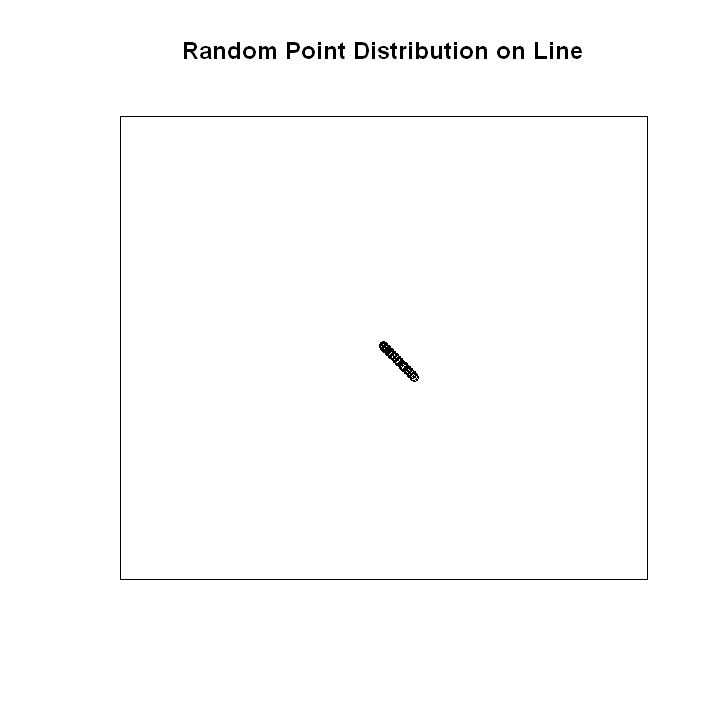

In [82]:
# Plot generated pattern
plot(line.pattern, main = "Random Point Distribution on Line")
plot(point.on.line, add = TRUE)